In [1]:
# Importing Data Manipilation Libraries
import pandas as pd
import numpy as np

# Import Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

url = 'https://raw.githubusercontent.com/mukeshmagar543/-Online-Shoppers-Purchasing-Intention-Dataset/refs/heads/main/online_shoppers_intention.csv'

df = pd.read_csv(url)

df.sample(frac = 1) # Data Shuffle

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11533,7,95.750000,0,0.0,41,1164.202381,0.004545,0.010606,27.078469,0.0,Dec,3,2,5,1,Returning_Visitor,True,True
7916,0,0.000000,2,35.2,16,275.100000,0.000000,0.027778,0.000000,0.0,Aug,2,2,3,3,Returning_Visitor,True,False
8575,0,0.000000,0,0.0,8,121.375000,0.000000,0.025000,0.000000,0.0,Dec,3,2,4,2,New_Visitor,False,False
3038,3,65.500000,2,12.0,39,1101.333333,0.009524,0.041270,14.996429,0.0,May,2,2,3,1,Returning_Visitor,False,False
2516,0,0.000000,2,52.0,12,699.250000,0.023810,0.028571,0.000000,0.0,May,1,1,3,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12299,3,9.000000,0,0.0,17,372.250000,0.000000,0.016667,0.000000,0.0,Nov,4,1,3,1,Returning_Visitor,False,False
3006,3,52.333333,0,0.0,2,291.000000,0.000000,0.040000,0.000000,0.0,May,2,2,7,3,New_Visitor,False,False
6227,0,0.000000,0,0.0,8,321.233333,0.000000,0.012500,0.000000,0.0,Jul,3,5,1,1,Returning_Visitor,False,False
4177,2,143.800000,1,0.0,6,90.750000,0.022222,0.055556,0.000000,0.0,May,3,2,8,3,Returning_Visitor,False,False


In [3]:
# Checking Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# **Target column is not balanced** 

In [5]:
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [6]:
# Using Replace to convert data into Numerica
df['Revenue'] = df['Revenue'].replace({'False' : 0, 'True' : 1})
# Using Replace to convert data into Numerica
df['Weekend'] = df['Weekend'].replace({'False' : 0, 'True' : 1})

In [7]:
# Using Label Encoding in Url column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Month'] = le.fit_transform(df['Month'])
df['Month'].value_counts()

Month
6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: count, dtype: int64

# **There is large amount of outliers are present in th dataset**

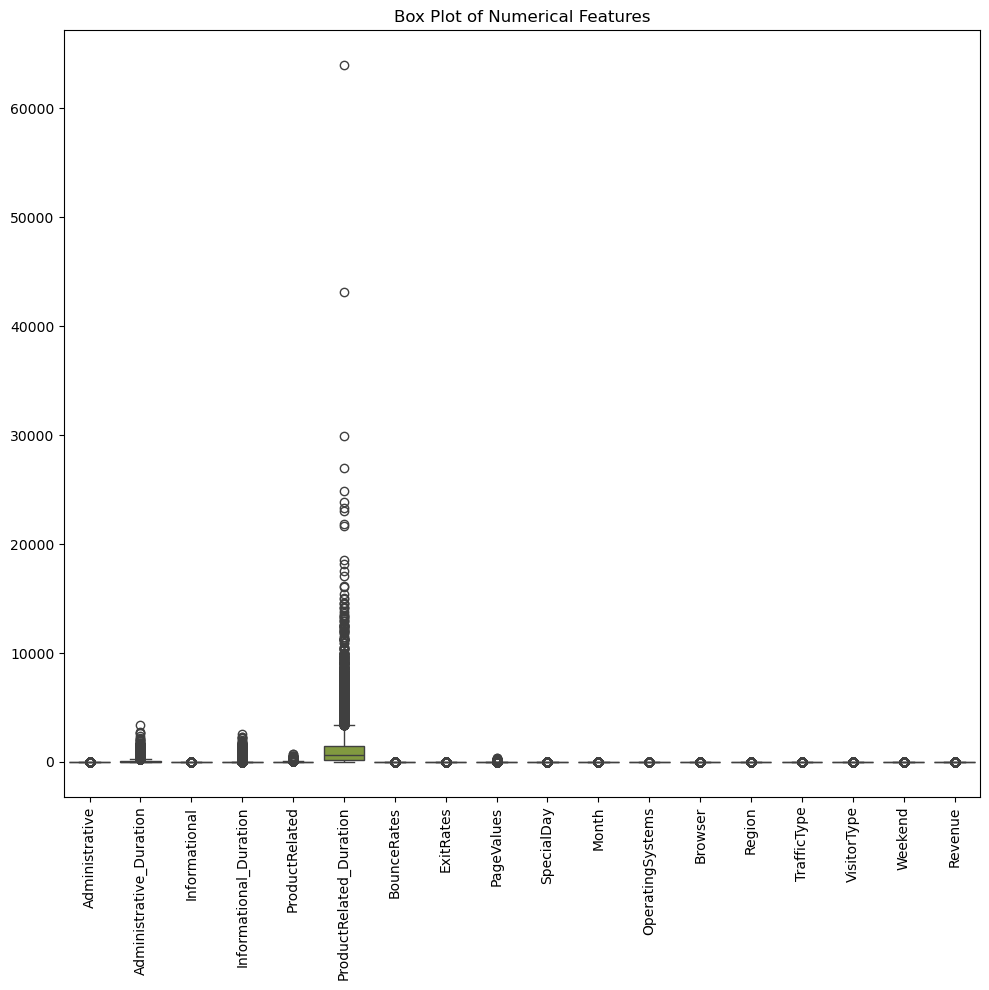

In [8]:
plt.figure(figsize=(10, 10))
sns.boxplot(data= df)
plt.xticks(rotation = 90)  
plt.title("Box Plot of Numerical Features")
plt.tight_layout()
plt.show()

In [9]:
# Replace Outliers with Median Statergy

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()  
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")

Replaced 404 outliers in 'Administrative' with median.
Replaced 1172 outliers in 'Administrative_Duration' with median.
Replaced 2631 outliers in 'Informational' with median.
Replaced 2405 outliers in 'Informational_Duration' with median.
Replaced 987 outliers in 'ProductRelated' with median.
Replaced 961 outliers in 'ProductRelated_Duration' with median.
Replaced 1551 outliers in 'BounceRates' with median.
Replaced 1099 outliers in 'ExitRates' with median.
Replaced 2730 outliers in 'PageValues' with median.
Replaced 1251 outliers in 'SpecialDay' with median.
Replaced 2160 outliers in 'Month' with median.
Replaced 111 outliers in 'OperatingSystems' with median.
Replaced 4369 outliers in 'Browser' with median.
Replaced 511 outliers in 'Region' with median.
Replaced 2101 outliers in 'TrafficType' with median.
Replaced 1779 outliers in 'VisitorType' with median.


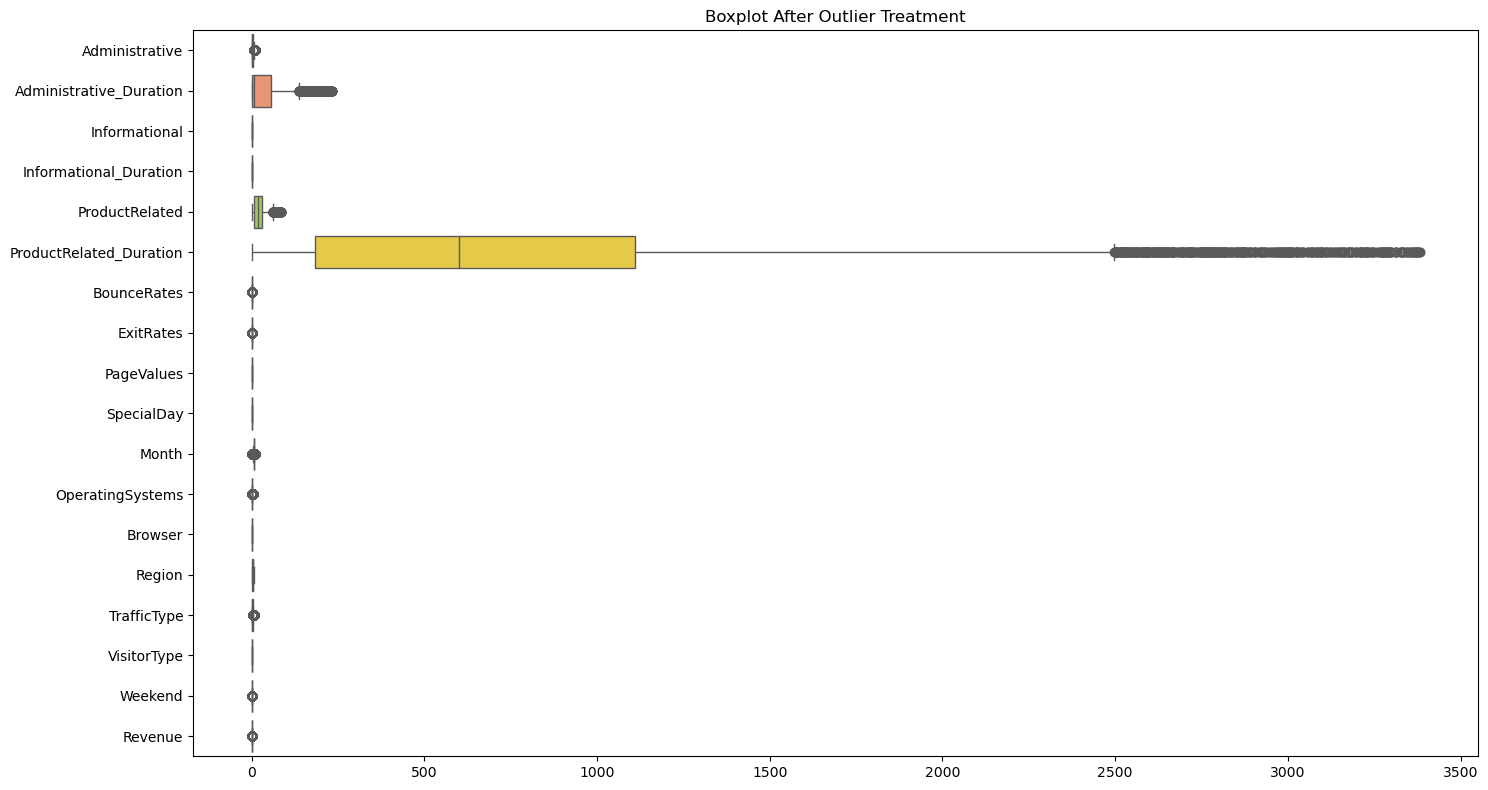

In [10]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

In [11]:
# Checking VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop('Revenue',axis = 1))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [13]:
df.corr()['Revenue']

Administrative             0.130287
Administrative_Duration    0.096589
Informational                   NaN
Informational_Duration          NaN
ProductRelated             0.137164
ProductRelated_Duration    0.143627
BounceRates               -0.088652
ExitRates                 -0.199251
PageValues                      NaN
SpecialDay                      NaN
Month                      0.116349
OperatingSystems          -0.025119
Browser                         NaN
Region                    -0.017950
TrafficType               -0.001423
VisitorType                     NaN
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

In [15]:
# Using PCA Concept:

# Step 1: Standardize the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_scaled = scaler.fit_transform(df)

# Step 2: Determine number of components to retain 90% variance

for i in range(1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio:", evr)
print("Number of components selected:", pcs)

# Step 3: Apply PCA

pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame

pca_columns = [f'PC{j+1}' for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 5: Join Target Column with PCA:

pca_df = pca_df.join(df['Revenue'], how = 'left')

pca_df

Explained Variance Ratio: [0.20847421 0.36346274 0.51195472 0.64896776 0.74474985 0.80372978
 0.85735637 0.90699229]
Number of components selected: 8


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Revenue
0,-2.885806,1.797314,-2.996543,-0.395348,0.298515,-1.083856,-0.403522,-0.692188,False
1,-4.035371,1.725265,-1.871525,0.496104,0.919390,0.262045,2.184648,-0.530842,False
2,-2.782702,2.909848,-1.612364,0.481969,0.003255,1.887978,-0.814704,-0.046269,False
3,-2.714537,3.533464,-0.911095,0.826910,-0.055819,0.895725,-0.639874,-0.342040,False
4,-3.134643,2.290951,-0.901922,2.807137,-0.240484,0.809536,-0.410078,-0.685377,False
...,...,...,...,...,...,...,...,...,...
12325,1.816256,-0.762258,-1.818047,0.709083,0.081877,1.983388,0.592590,-0.631482,False
12326,-0.280226,-0.427501,0.655684,-1.470303,-0.182590,0.910560,-0.422445,-0.609755,False
12327,-1.551832,-1.291418,1.094029,-0.612928,0.665200,1.153602,1.515528,-0.514289,False
12328,1.037176,-0.174875,0.154400,-0.910022,0.949714,0.000365,-0.052761,0.006735,False


In [16]:
from sklearn.model_selection import train_test_split
X = pca_df.drop(columns= 'Revenue', axis=1)
y = pca_df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_pred_RF = RF.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score_RF = accuracy_score(y_pred_RF,y_test)
accuracy_score_RF

0.8381995133819952

In [17]:
# Using SGD classifier
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()

SGD.fit(X_train,y_train)

y_pred_SGD = SGD.predict(X_test)
accuracy_score_SGD = accuracy_score(y_pred_SGD,y_test)

accuracy_score_SGD

0.8333333333333334

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF, X_train, y_train, cv= 10, scoring= 'accuracy')

print('Accuracy for each fold : ', scores)
print('Average Accuracy across 10 folds : ', np.mean(scores))

Accuracy for each fold :  [0.84397163 0.8449848  0.8449848  0.84802432 0.85801217 0.85192698
 0.84888438 0.84888438 0.85598377 0.84381339]
Average Accuracy across 10 folds :  0.8489470623172233
